<a href="https://colab.research.google.com/github/Alfonzo-droid/Alfonzo-droid/blob/main/4GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/MarketPower.csv"
df = pd.read_csv(url)

In [ ]:
df['q'] = (df['theta'] - df['cm']) / (2*df['beta'])

In [ ]:
df['Q'] =  df.groupby(by=['sector'])['q'].transform('sum')

In [ ]:
df['share']  = df['q']/df['Q']

In [ ]:
def cv(serie):
  return serie.std()/serie.mean()

In [ ]:
def ratio(serie):
  return serie.max()/serie.min()

In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = pd.Series(array)
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [ ]:
pd.Series(df['share'])

,share
0,0.016151
1,0.016638
2,0.029581
3,0.023027
4,0.018332
...,...
122,0.143909
123,0.307672
124,0.282835
125,0.150101


In [ ]:
cv(df['q'])

1.4649711673246488

In [ ]:
df.groupby(by=['sector'])[['cm', 'q']].agg(['mean', 'std', cv, gini, ratio])

cm                                                   q  \
                  mean       std        cv      gini     ratio        mean   
sector                                                                       
Agriculture   6.503434  1.230096  0.189146  0.108326  1.842854   28.450231   
Diapers       4.322635  0.160488  0.037127  0.013126  1.053922  302.572972   
Financial     4.640864  0.922025  0.198675  0.097189  1.621353   35.120459   
Software     10.030047  1.184926  0.118138  0.065970  1.458611    5.666795   

                                                        
                    std        cv      gini      ratio  
sector                                                  
Agriculture   16.968497  0.596427  0.309387   6.369185  
Diapers      208.504628  0.689105  0.243636   2.900696  
Financial     15.517301  0.441831  0.209323   2.664236  
Software       6.032761  1.064581  0.469876  12.623381

In [ ]:
df[df['sector']=='Financial']['q'].mean()

35.12045891583861

In [ ]:
df['share'].sort_values(ascending=False)

,share
20,0.743636
123,0.307672
124,0.282835
21,0.256364
13,0.203882
...,...
99,0.004459
92,0.004456
59,0.004323
93,0.004083


In [ ]:
['Agruculture', 'Financial', 'Software']

['Agruculture', 'Financial', 'Software']

In [ ]:
for sector in df['sector'].unique():
  print('--'*25)
  print(sector)
  print('--'*25)
  display(df[df['sector']==sector][['share']].sort_values(by=['share'], ascending=False)[0:3])
  display(df[df['sector']==sector][['share']].sort_values(by=['share'], ascending=True)[0:3])

--------------------------------------------------
Software
--------------------------------------------------


,share
13,0.203882
9,0.146938
7,0.144303


,share
0,0.016151
1,0.016638
17,0.017708


--------------------------------------------------
Diapers
--------------------------------------------------


,share
20,0.743636
21,0.256364


,share
21,0.256364
20,0.743636


--------------------------------------------------
Agriculture
--------------------------------------------------


,share
110,0.025986
25,0.025972
114,0.025959


,share
44,0.004080
93,0.004083
59,0.004323


--------------------------------------------------
Financial
--------------------------------------------------


,share
123,0.307672
124,0.282835
125,0.150101


,share
126,0.115482
122,0.143909
125,0.150101


In [ ]:
df['indicator'] = 0

1 - Se agrega una columna llamada ”indicator” con 0s en todos los registros

2 - Se crea un diccionario vacio bajo el nombre de ”registros”

3 - El diccionario debe contener los indices de las empresas top 3 de q en cada sector {“Financial”: [12, 34, 478], … }

In [ ]:
registros = {}

for sector in df['sector'].unique():
  registros[sector] = df[df['sector']==sector][['share']].sort_values(by=['share'], ascending=False)[0:3].index

In [ ]:
registros

{'Software': Index([13, 9, 7], dtype='int64'),
 'Diapers': Index([20, 21], dtype='int64'),
 'Agriculture': Index([110, 25, 114], dtype='int64'),
 'Financial': Index([123, 124, 125], dtype='int64')}

In [ ]:
for sector in df['sector'].unique():
  df.loc[registros[sector], "indicator"] = 1

In [ ]:
df

,Unnamed: 0,theta,beta,cm,sector,q,Q,share,indicator
0,0,125.121419,31.5,9.799712,Software,1.830503,113.335900,0.016151,0
1,1,125.645324,30.5,10.616998,Software,1.885710,113.335900,0.016638,0
2,2,126.766324,17.5,9.426922,Software,3.352554,113.335900,0.029581,0
3,3,127.141536,22.5,9.698818,Software,2.609838,113.335900,0.023027,0
4,4,127.472341,28.5,9.042124,Software,2.077723,113.335900,0.018332,0
...,...,...,...,...,...,...,...,...,...
122,0,1237.516764,24.4,4.306088,Financial,25.270711,175.602295,0.143909,0
123,1,1236.938396,11.4,5.101223,Financial,54.027946,175.602295,0.307672,1
124,2,1235.802773,12.4,4.073056,Financial,49.666521,175.602295,0.282835,1
125,3,1237.271186,23.4,3.709515,Financial,26.358155,175.602295,0.150101,1


<Axes: xlabel='sector', ylabel='share'>

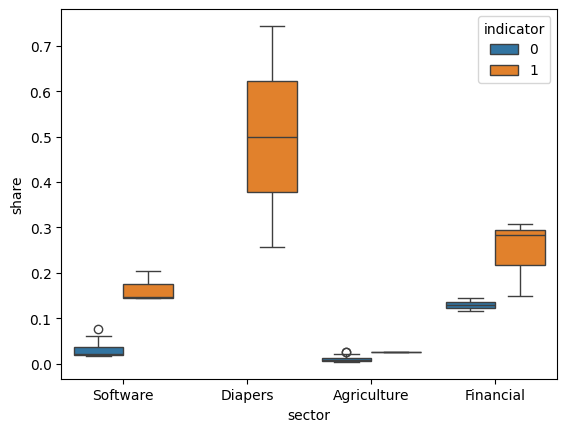

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x="sector", y="share", hue="indicator")